<a href="https://colab.research.google.com/github/Shadoww002/PyTorch-Learning/blob/main/Chapter%204%20%E2%80%93%20Custom%20Datasets/CustomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
## Getting DATA
import requests
import zipfile
from pathlib import Path

## setup path to data folder
data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"

## check if exist
if image_path.is_dir():
  print(f"{image_path} already Exist ...")
else :
  print(f"{image_path} Does Not Exixst ...Creating It")
  image_path.mkdir(parents=True,
                   exist_ok=True)

## Download Data
with open(data_path/"pizza_steak_sushi.zip" , "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading Data ....")
  f.write(request.content)

## Unzip zip Files
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip" , "r") as zip_ref:
  print("UnZiping The Data ...")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi Does Not Exixst ...Creating It
UnZiping The Data ...


In [4]:
## Explore Data Set
import os

def walk_through_dir(dir_path):
  for dirpath , dirnames , filenames in os.walk(dir_path) :
    print(f"There are {len(dirnames)} directories ans {len(filenames)} images in {dirpath}'.'")


In [5]:
walk_through_dir(image_path)

There are 2 directories ans 0 images in data/pizza_steak_sushi'.'
There are 3 directories ans 0 images in data/pizza_steak_sushi/train'.'
There are 0 directories ans 78 images in data/pizza_steak_sushi/train/pizza'.'
There are 0 directories ans 72 images in data/pizza_steak_sushi/train/sushi'.'
There are 0 directories ans 75 images in data/pizza_steak_sushi/train/steak'.'
There are 3 directories ans 0 images in data/pizza_steak_sushi/test'.'
There are 0 directories ans 25 images in data/pizza_steak_sushi/test/pizza'.'
There are 0 directories ans 31 images in data/pizza_steak_sushi/test/sushi'.'
There are 0 directories ans 19 images in data/pizza_steak_sushi/test/steak'.'


In [6]:
##Setup Train and Test paths
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/steak/735441.jpg
Image class: steak
Image height: 512
Image width: 512


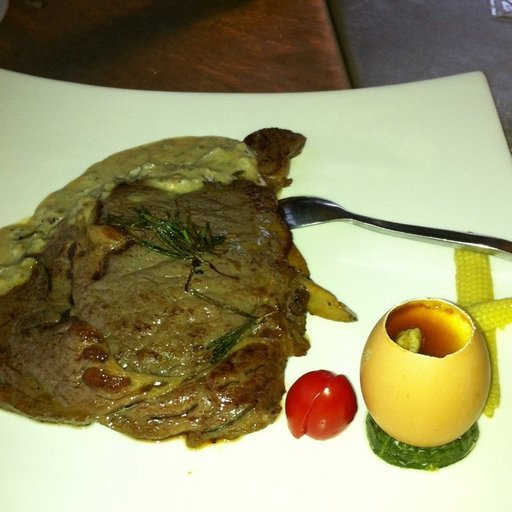

In [7]:
import random
from PIL import Image

# Set seed
# random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

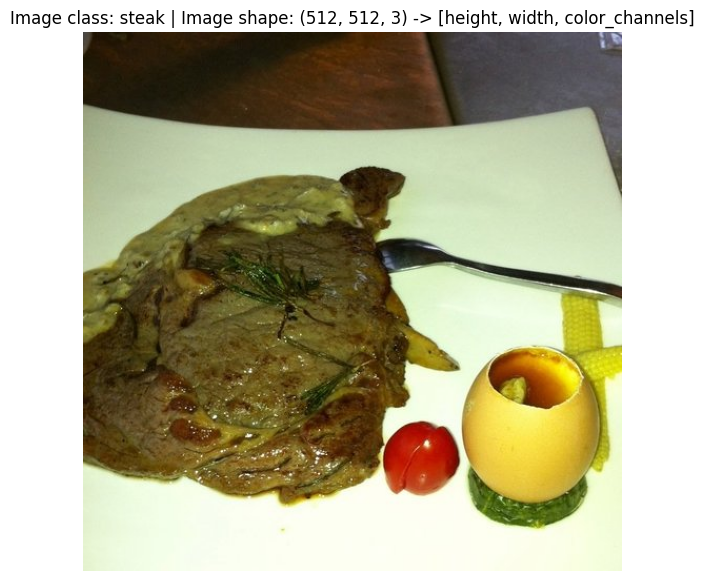

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

array([[[ 71,  70,  68],
        [ 74,  73,  69],
        [ 77,  73,  70],
        ...,
        [154, 155, 176],
        [174, 172, 193],
        [189, 186, 207]],

       [[ 70,  69,  67],
        [ 73,  72,  68],
        [ 76,  73,  68],
        ...,
        [147, 149, 172],
        [182, 180, 202],
        [203, 199, 222]],

       [[ 72,  68,  65],
        [ 74,  70,  67],
        [ 75,  70,  66],
        ...,
        [ 96, 100, 125],
        [127, 127, 153],
        [158, 155, 182]],

       ...,

       [[229, 243, 207],
        [229, 243, 207],
        [230, 244, 208],
        ...,
        [241, 251, 217],
        [241, 251, 217],
        [240, 250, 216]],

       [[229, 243, 207],
        [229, 243, 207],
        [229, 243, 207],
        ...,
        [241, 251, 217],
        [241, 251, 217],
        [240, 250, 216]],

       [[227, 241, 205],
        [228, 242, 206],
        [228, 242, 206],
        ...,
        [241, 251, 217],
        [241, 251, 217],
        [240, 250, 216]]], dtype=uint8)
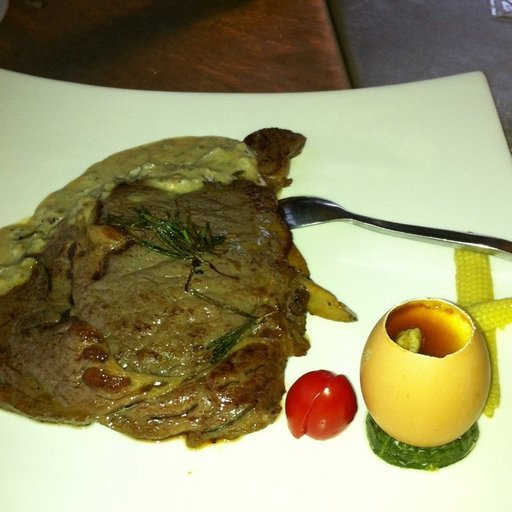

In [9]:
img_as_array

In [10]:
### Using Torch Transform to transform Data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

In [11]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [12]:
data_transform(img)

tensor([[[0.2745, 0.1529, 0.1255,  ..., 0.4549, 0.4667, 0.5569],
         [0.2510, 0.1608, 0.1529,  ..., 0.4353, 0.4235, 0.4431],
         [0.1686, 0.1412, 0.1686,  ..., 0.3451, 0.3333, 0.3294],
         ...,
         [0.9059, 0.9137, 0.9216,  ..., 0.9608, 0.9569, 0.9529],
         [0.9020, 0.9137, 0.9216,  ..., 0.9569, 0.9569, 0.9529],
         [0.9020, 0.9137, 0.9216,  ..., 0.9569, 0.9529, 0.9490]],

        [[0.2431, 0.1020, 0.0784,  ..., 0.4627, 0.4706, 0.5725],
         [0.2118, 0.0980, 0.0941,  ..., 0.4431, 0.4196, 0.4353],
         [0.1255, 0.0902, 0.0980,  ..., 0.3412, 0.3216, 0.3098],
         ...,
         [0.9608, 0.9686, 0.9725,  ..., 1.0000, 0.9961, 0.9922],
         [0.9569, 0.9686, 0.9725,  ..., 0.9961, 0.9961, 0.9922],
         [0.9569, 0.9647, 0.9725,  ..., 0.9961, 0.9922, 0.9882]],

        [[0.2000, 0.0392, 0.0157,  ..., 0.5412, 0.5686, 0.6902],
         [0.1490, 0.0275, 0.0157,  ..., 0.5098, 0.4745, 0.4980],
         [0.0510, 0.0157, 0.0157,  ..., 0.3725, 0.3333, 0.

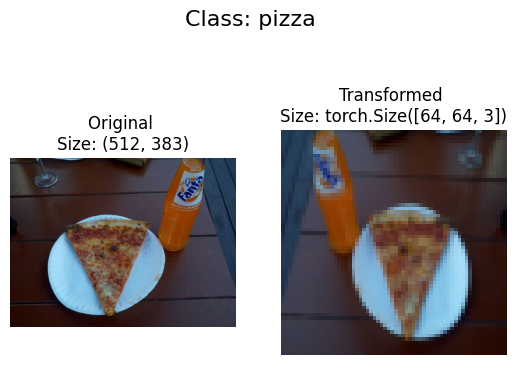

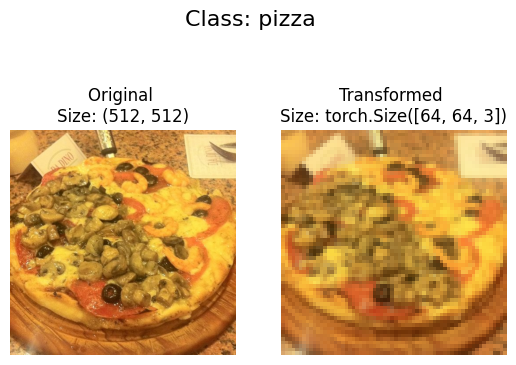

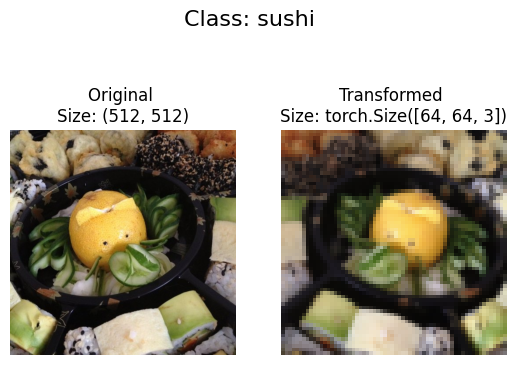

In [13]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [14]:
## Option 1 : Using ImageFolder To Load The Images from dir to tensor and DataLoader
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform = data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
train_data.classes

['pizza', 'steak', 'sushi']

In [17]:
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [16]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [20]:
len(train_data) , len(test_data)

(225, 75)

In [23]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [37]:
train_data[0]

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [38]:
img , label = train_data[0][0] , train_data[0][1]

In [28]:
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [29]:
label

0

In [39]:
class_name[label]

'pizza'

In [41]:
## Change img dimension i.e putting Color chanel at last
img_permute = img.permute(1, 2 , 0)
img_permute.shape

torch.Size([64, 64, 3])

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

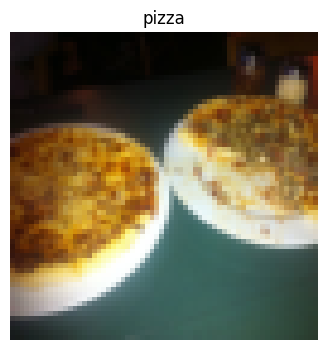

In [44]:
plt.figure(figsize=(6, 4))
plt.imshow(img_permute)
plt.title(class_name[label])
plt.axis(False)

In [45]:
import os
os.cpu_count()

2

In [51]:
## Converting DataSet To DataLoader
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = 1,
    num_workers=os.cpu_count(),
    shuffle=True
)
test_dataloader = DataLoader(
    dataset = test_data,
    shuffle=False ,
    batch_size=1,
    num_workers=os.cpu_count(),
)

In [50]:
train_dataloader.dataset

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [52]:
len(train_dataloader) , len(test_dataloader)

(225, 75)

In [55]:
img , label = next(iter(train_dataloader))
img.shape , label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))